In [ ]:
from transformers import pipeline
import  argparse
import pandas as pd
import json
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Test the human abstract and chatgpt abstract using roberta-academic-detector


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipeline("text-classification", model="andreas122001/roberta-academic-detector", device=device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/Marcus_Project/Original/arxiv_chatGPT.jsonl', lines=True)

prediction_all = []
actual_all = ['Fake' for _ in range(3000)]
actual_all.extend(['Real' for _ in range(3000)])
prediction_all_human = []

max_seq_length = 512
count = 0
for df in df.itertuples():
  #print(df.machine_abstract)
  count += 1
  print(count, end=", ")
  prediction = json.loads(json.dumps(pipe(df.machine_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all.append(prediction)
  #print(prediction_all)
  prediction = json.loads(json.dumps(pipe(df.human_text[:max_seq_length])[0]['label'].capitalize()))
  prediction_all_human.append(prediction)
  #print(prediction_all)


prediction_all.extend(prediction_all_human)


1, 

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 2

['Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Machine-generated', 'Machine-generated', 'Machine-generated', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Human-produced', 'Machine-generated', 'Machine-generated', 'Human-produced', 'Human-produced', 'Machine-generated', 'Human-produced', 'Machine-generated', 'Machi

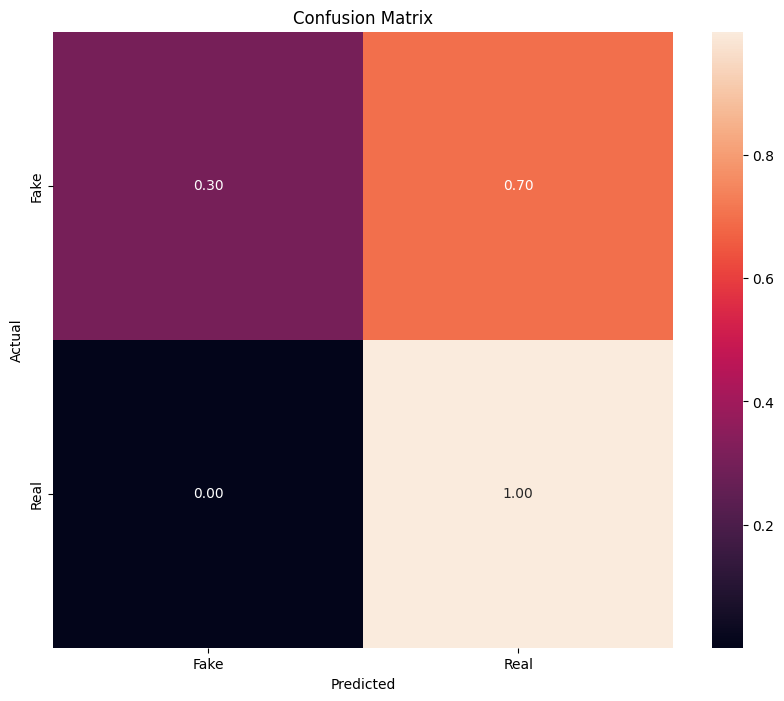

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(prediction_all)
print(actual_all)
prediction_all = ['Real' if x == 'Human-produced' else x for x in prediction_all]
prediction_all = ['Fake' if x == 'Machine-generated' else x for x in prediction_all]
conf_matrix = confusion_matrix(actual_all, prediction_all)
cm = conf_matrix
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
